In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import read_stats, assign_channels, plot_kde
import scipy
from itertools import combinations, product
from tqdm import tqdm
plt.rcParams['figure.figsize'] = [10,10]

In [2]:
channels={1:'Foxp3',2:'MHCII',3:'CD8a',4:'CD3',5:'Nur77_GFP',6:'TCF1',7:'CD4',8:'autofl',9:'IRF4'}
LN1_df=assign_channels(read_stats(r'..\240404_irf4_correlation\LN1_Statistics'),channels)
LN1_df['image']='LN1'
LN2_df=assign_channels(read_stats(r'..\240404_irf4_correlation\LN2_Statistics'),channels)
LN2_df['image']='LN2'
LN3_df=assign_channels(read_stats(r'..\240404_irf4_correlation\LN3_Statistics'),channels)
LN3_df['image']='LN3'
LN4_df=assign_channels(read_stats(r'..\240404_irf4_correlation\LN4_Statistics'),channels)
LN4_df['image']='LN4'
LN5_df=assign_channels(read_stats(r'..\240404_irf4_correlation\LN5_Statistics'),channels)
LN5_df['image']='LN5'

d:\WongLabUsers\Eric\analysis\utils.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[title]=pd.read_csv(dir+r"\\"+file,header=2).iloc[:,0]
d:\WongLabUsers\Eric\analysis\utils.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[title]=pd.read_csv(dir+r"\\"+file,header=2).iloc[:,0]
d:\WongLabUsers\Eric\analysis\utils.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

In [23]:
all_df=pd.concat((LN1_df,LN2_df,LN3_df,LN4_df,LN5_df))

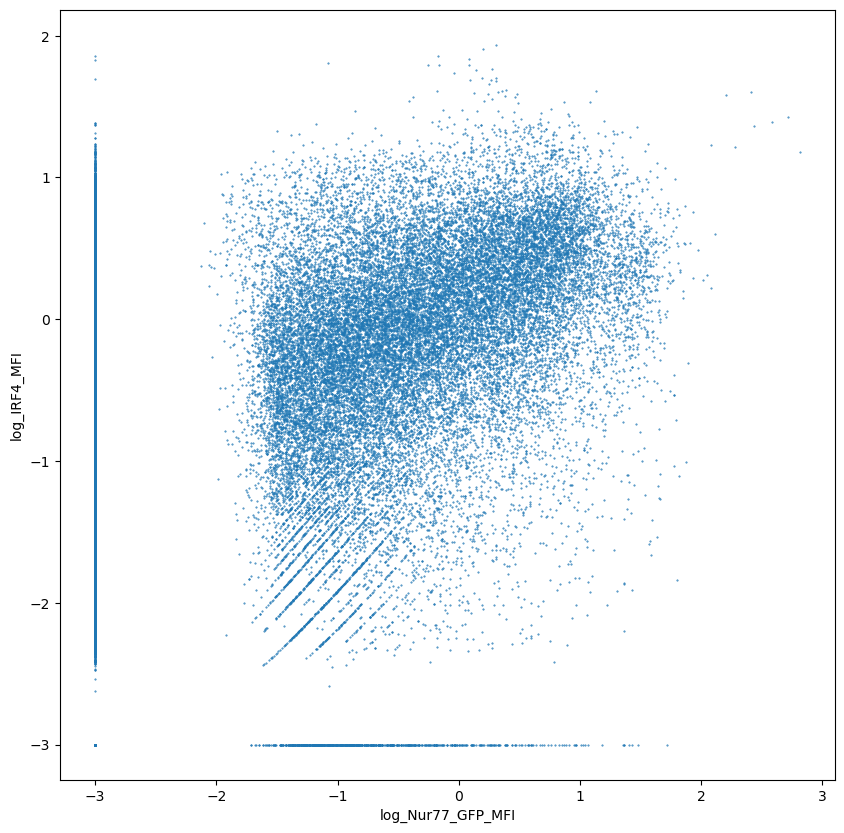

In [34]:
mode='log'
normalize=True
if mode=='log':
    if normalize:
        plt.scatter(np.log10(all_df['Intensity_Mean_Nur77_GFP']/np.mean(all_df['Intensity_Mean_Nur77_GFP'])+1e-3),np.log10(all_df['Intensity_Mean_IRF4']/np.mean(all_df['Intensity_Mean_IRF4'])+1e-3),s=0.2)
        plt.xlabel('log_Nur77_GFP_MFI')
        plt.ylabel('log_IRF4_MFI')
    else:
        plt.scatter(np.log10(all_df['Intensity_Mean_Nur77_GFP']+1e-3),np.log10(all_df['Intensity_Mean_IRF4']+1e-3),s=0.2)
        plt.xlabel('log_Nur77_GFP_MFI')
        plt.ylabel('log_IRF4_MFI')
if mode=='linear':
    if normalize:
        plt.scatter(all_df['Intensity_Mean_Nur77_GFP']/np.mean(all_df['Intensity_Mean_Nur77_GFP']),all_df['Intensity_Mean_IRF4']/np.mean(all_df['Intensity_Mean_IRF4']),s=0.2)
        plt.xlabel('Nur77_GFP_MFI')
        plt.ylabel('IRF4_MFI')
    else:
        plt.scatter(all_df['Intensity_Mean_Nur77_GFP'],all_df['Intensity_Mean_IRF4'],s=0.2)
        plt.xlim(-1,1)
        plt.ylim(-1,2)
        plt.xlabel('Nur77_GFP_MFI')
        plt.ylabel('IRF4_MFI')

In [ ]:
all_df['mean_nur77_norm_mean']=all_df['Intensity_Mean_Nur77_GFP']/np.mean(all_df['Intensity_Mean_Nur77_GFP'])
all_df['mean_irf4_norm_mean']=all_df['Intensity_Mean_IRF4']/np.mean(all_df['Intensity_Mean_IRF4'])
filtered1_df=all_df[all_df['mean_nur77_norm_mean']>0.01]
print(scipy.stats.linregress(np.log10(all_df['mean_nur77_norm_mean']+1e-3),np.log10(all_df['mean_irf4_norm_mean']+1e-3)))
print(scipy.stats.spearmanr(np.log10(all_df['mean_nur77_norm_mean']+1e-3),np.log10(all_df['mean_irf4_norm_mean']+1e-3)))

In [49]:
all_df['mean_nur77_norm_mean']=all_df['Intensity_Mean_Nur77_GFP']/np.mean(all_df['Intensity_Mean_Nur77_GFP'])
all_df['mean_irf4_norm_mean']=all_df['Intensity_Mean_IRF4']/np.mean(all_df['Intensity_Mean_IRF4'])
filtered1_df=all_df[all_df['mean_nur77_norm_mean']>0.01]
filtered_df=filtered1_df[filtered1_df['mean_irf4_norm_mean']>0.002]
linregress=scipy.stats.linregress(np.log10(filtered_df['mean_nur77_norm_mean']+1e-3),np.log10(filtered_df['mean_irf4_norm_mean']+1e-3))
print(linregress)
print(scipy.stats.spearmanr(np.log10(filtered_df['mean_nur77_norm_mean']+1e-3),np.log10(filtered_df['mean_irf4_norm_mean']+1e-3)))

LinregressResult(slope=0.3393127388775935, intercept=-0.030844876301968055, rvalue=0.385801371382265, pvalue=0.0, stderr=0.004767734279809112, intercept_stderr=0.0041780995143775495)
SpearmanrResult(correlation=0.41139974384702227, pvalue=0.0)


Text(0, 0.5, 'log_IRF4_MFI')

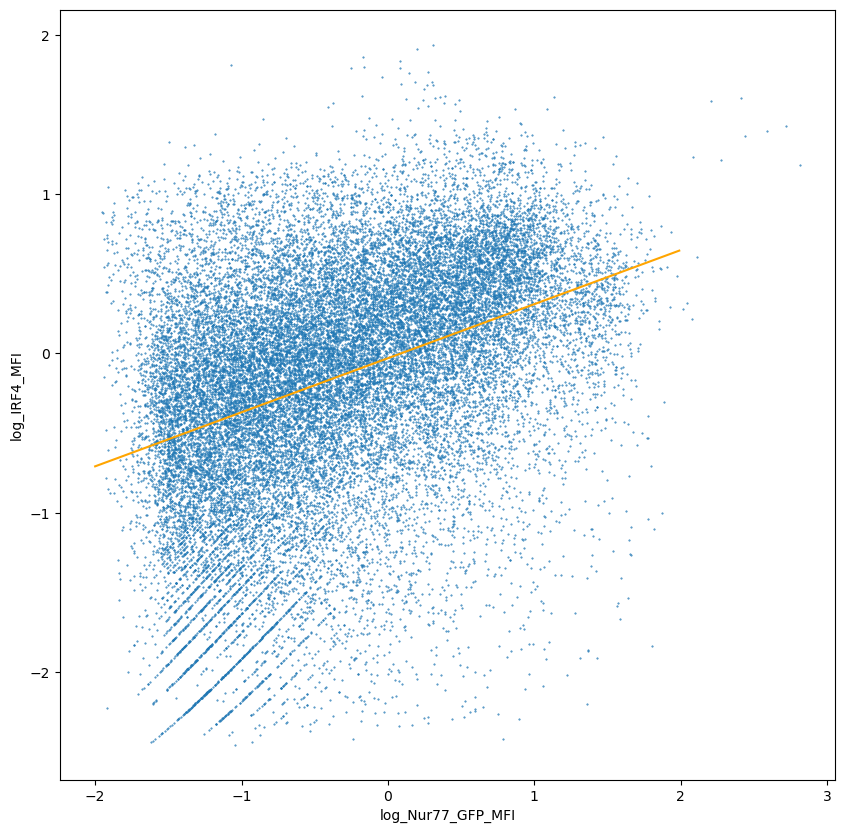

In [50]:
x_array=np.arange(-2,2,0.01)
plt.plot(x_array,x_array*linregress.slope+linregress.intercept,c='orange')
plt.scatter(np.log10(filtered_df['mean_nur77_norm_mean']+1e-3),np.log10(filtered_df['mean_irf4_norm_mean']+1e-3),s=0.2)
plt.xlabel('log_Nur77_GFP_MFI')
plt.ylabel('log_IRF4_MFI')

In [6]:
scipy.stats.linregress(np.log10(all_df['Intensity_Mean_Nur77_GFP']+1e-3),np.log10(all_df['Intensity_Mean_IRF4']+1e-3))

LinregressResult(slope=0.7221471624356708, intercept=0.4377787526392489, rvalue=0.5487635894035177, pvalue=0.0, stderr=0.004102337156922597, intercept_stderr=0.0105829309872025)

In [10]:
scipy.stats.spearmanr(np.log10(all_df['Intensity_Mean_Nur77_GFP']+1e-3),np.log10(all_df['Intensity_Mean_IRF4']+1e-3))

SpearmanrResult(correlation=0.5933038575785868, pvalue=0.0)

Text(0, 0.5, 'log_IRF4_MFI')

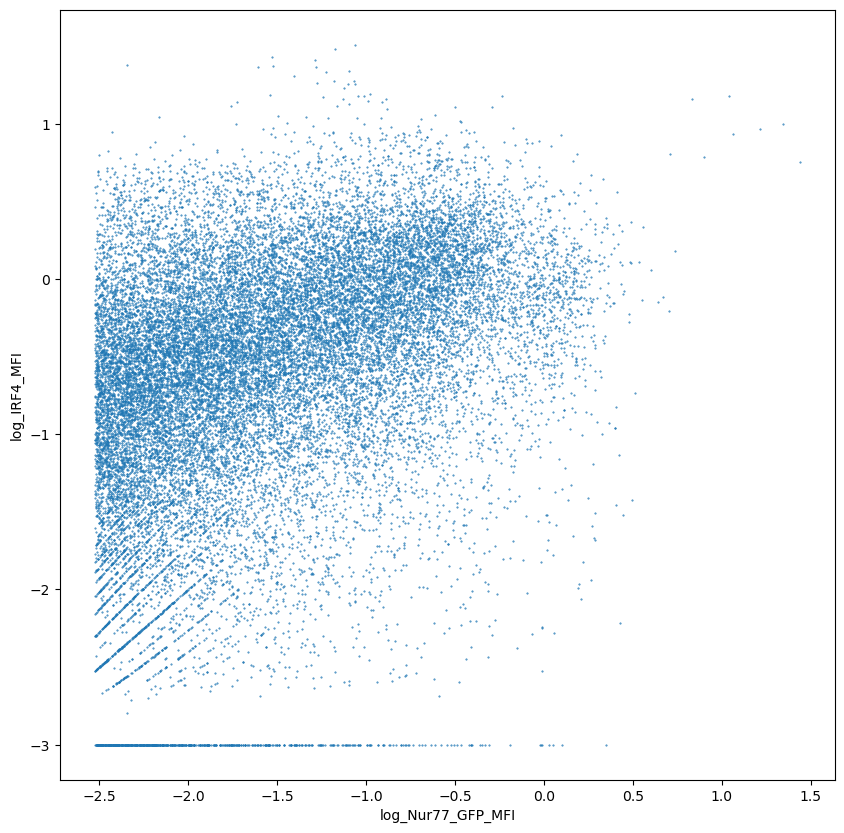

In [12]:
filtered_df=all_df[all_df['Intensity_Mean_Nur77_GFP']>10**(-2.7)]
plt.scatter(np.log10(filtered_df['Intensity_Mean_Nur77_GFP']+1e-3),np.log10(filtered_df['Intensity_Mean_IRF4']+1e-3),s=0.2)
plt.xlabel('log_Nur77_GFP_MFI')
plt.ylabel('log_IRF4_MFI')

In [13]:
scipy.stats.linregress(np.log10(filtered_df['Intensity_Mean_Nur77_GFP']+1e-3),np.log10(filtered_df['Intensity_Mean_IRF4']+1e-3))

LinregressResult(slope=0.42223560691938716, intercept=0.05979536262559648, rvalue=0.3745258074074661, pvalue=0.0, stderr=0.006453158568412123, intercept_stderr=0.01089501715868645)

In [11]:
scipy.stats.spearmanr(np.log10(filtered_df['Intensity_Mean_Nur77_GFP']+1e-3),np.log10(filtered_df['Intensity_Mean_IRF4']+1e-3))

SpearmanrResult(correlation=0.393179868087434, pvalue=0.0)

Text(0, 0.5, 'log_IRF4_SFI')

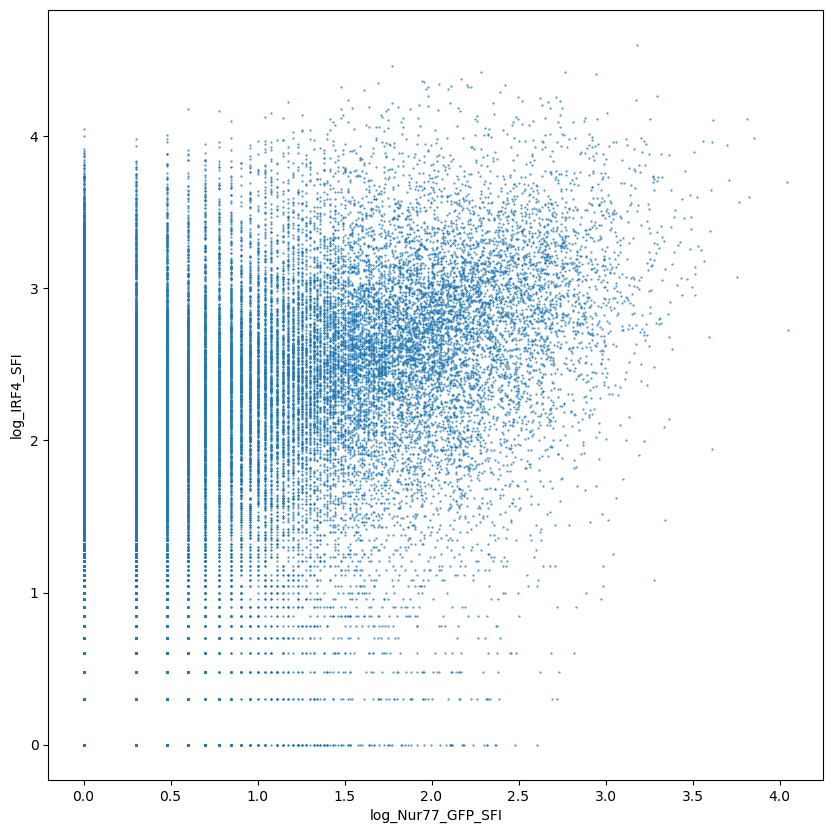

In [5]:
plt.scatter(np.log10(all_df['Intensity_Sum_Nur77_GFP']+1),np.log10(all_df['Intensity_Sum_IRF4']+1),s=0.2)
plt.xlabel('log_Nur77_GFP_SFI')
plt.ylabel('log_IRF4_SFI')